# Spatial Filtering

### Image median filtering
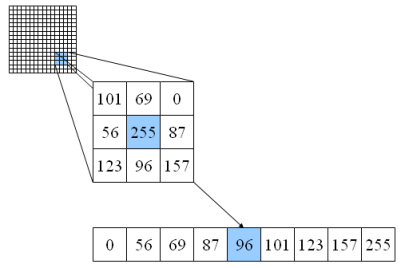

**การกรองด้วยค่ามัธยฐาน (Median filtering)** เป็นเทคนิคทั่วไปที่ใช้ในการประมวลผลภาพเพื่อลดสัญญาณรบกวน แนวคิดพื้นฐานคือแทนค่าพิกเซลแต่ละตำแหน่งในภาพด้วยค่ามัธยฐานของความเข้มในบริเวณรอบข้างของพิกเซลนั้น วิธีนี้มีประสิทธิภาพเป็นพิเศษในการลบ noise เกลือแล่งพริกไทย (salt and pepper) ออกจากภาพ

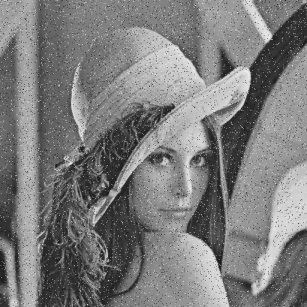  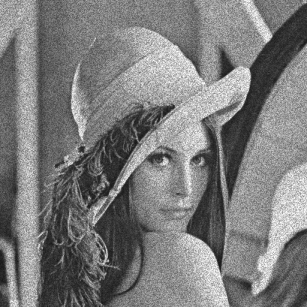

ภาพรวมการทำงานโดยสรุป:

- **1. การกำหนดบริเวณรอบข้าง (Neighborhood):** เริ่มจากกำหนดหน้าต่างรอบพิกเซลแต่ละจุด โดยทั่วไปเป็นหน้าต่างสี่เหลี่ยมจัตุรัสที่มีจุดศูนย์กลางอยู่ที่พิกเซลนั้น ขนาดหน้าต่างอาจต่างกัน เช่น 3x3, 5x5 หรือ 7x7 พิกเซล
- **2. การคำนวณค่ามัธยฐาน:** สำหรับพิกเซลแต่ละจุด ให้คำนวณค่ามัธยฐานของค่าพิกเซลในบริเวณข้างเคียง รวมถึงพิกเซลกลางด้วย
- **3. การแทนค่าพิกเซล:** แทนค่าพิกเซลเดิมด้วยค่ามัธยฐานที่คำนวณได้ ทำเช่นนี้กับทุกพิกเซลในภาพ


### นำเข้าโมดูล

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### โมดูลแสดงภาพ

In [ ]:
def plt_show(img):
    plt.axis("off")
    plt.imshow(img, cmap='gray')
    plt.show()

In [ ]:
def cv_show(img):
    cv2.imshow('Mean Filtered Image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

#### วิธีที่ 1 ใช้ไลบรารี cv

In [ ]:
def MedianBlur(img, k):
    # ใช้ฟังก์ชัน cv2.medianBlur จากไลบรารี OpenCV
    return cv2.medianBlur(img, 3)  

### 1. อ่านภาพ

In [ ]:
image = cv2.imread('./img/lena_salt_512.png', 1)  # อ่านภาพ BGR
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # แปลงเป็น grayscale
print(type(gray), gray.shape)  # แสดงชนิดและขนาดภาพ

<class 'numpy.ndarray'> (512, 512)


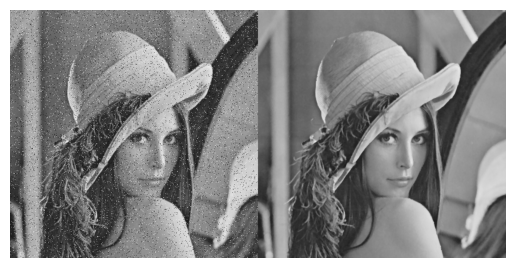

In [ ]:
blur_img = cv2.medianBlur(gray, 3)  # เบลอด้วยค่ามัธยฐาน kernel 3×3
imgs = cv2.hconcat([gray, blur_img])  # เชื่อมภาพต้นฉบับและผลลัพธ์ในแนวนอน
plt_show(imgs)  # แสดงผลลัพธ์

In [ ]:
def MedianCustom(img, sz):
    # ขั้นตอนที่ 1: คำนวณขนาดขอบและตำแหน่งค่ามัธยฐาน
    bd = int(sz / 2)  # ระยะขอบ
    inx = int(float(sz*sz)/2.0)  # ตำแหน่งค่ามัธยฐานหลังเรียงลำดับ
    
    # ขั้นตอนที่ 2: ดึงมิติของภาพ
    (m,n) = img.shape
    
    # สร้างภาพผลลัพธ์
    #out = np.zeros((m,n), dtype = 'float16')  # สร้างภาพเปล่า
    out = img.copy()  # คัดลอกภาพเดิม (เก็บค่าขอบไว้)
    
    # ขั้นตอนที่ 3: วนลูปผ่านทุกพิกเซล (ยกเว้นขอบ)
    for i in range(bd, m-bd):
        for j in range(bd, n-bd):
            # ดึงบริเวณรอบพิกเซล
            sub_img = img[i-bd:i+bd+1, j-bd:j+bd+1]
            # เรียงลำดับค่าจากน้อยไปมาก
            # ravel = แปลงอาร์เรย์ 2D (3×3) เป็น 1D [p1,p2,p3,p4,p5,...,p9]
            asort = np.sort(np.ravel(sub_img))
            # ใช้ค่ามัธยฐาน (ค่าตรงกลางของอาร์เรย์ที่เรียงลำดับ)
            out[i,j] = asort[inx]    
    
    return out.astype(np.uint8)


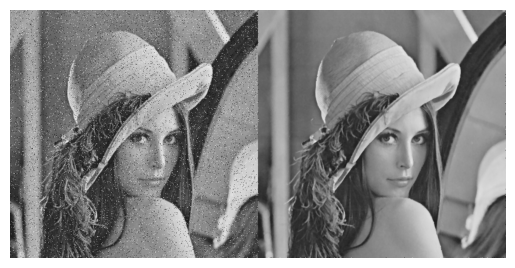

In [11]:
blur_img = MedianCustom(gray, 3)  # เบลอด้วยค่ามัธยฐานเอง kernel 3×3
imgs = cv2.hconcat([gray, blur_img])  # เชื่อมภาพต้นฉบับและผลลัพธ์
plt_show(imgs)  # แสดงผลลัพธ์
